<a href="https://colab.research.google.com/github/rkmate/Music-Recommendation-System/blob/main/Music_Recom1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import urllib.request
from zipfile import ZipFile

HOME_DIRECTORY = os.path.join('datasets','raw')
ROOT_URL = 'https://os.unil.cloud.switch.ch/fma/fma_metadata.zip'

if not os.path.isdir(HOME_DIRECTORY):
    os.makedirs(HOME_DIRECTORY)
zip_path = os.path.join(HOME_DIRECTORY, 'data.zip')
urllib.request.urlretrieve(ROOT_URL, zip_path)

with ZipFile(zip_path, 'r') as zip:
    zip.extractall(HOME_DIRECTORY)
    print("Done!")

Done!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as ms
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 2000)

In [ ]:
echonest = pd.read_csv('datasets/raw/fma_metadata/echonest.csv')
features = pd.read_csv('datasets/raw/fma_metadata/features.csv')
genres = pd.read_csv('datasets/raw/fma_metadata/genres.csv')
tracks = pd.read_csv('datasets/raw/fma_metadata/tracks.csv')

<ipython-input-20-6800a56e5c98>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249) have mixed types. Specify dtype option on import or set low_memor

In [ ]:
echonest.info()
features.info()
genres.info()
tracks.info()
echonest.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Columns: 250 entries, Unnamed: 0 to echonest.248
dtypes: object(250)
memory usage: 25.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album

,Unnamed: 0,echonest,echonest.1,echonest.2,echonest.3,echonest.4,echonest.5,echonest.6,echonest.7,echonest.8,echonest.9,echonest.10,echonest.11,echonest.12,echonest.13,echonest.14,echonest.15,echonest.16,echonest.17,echonest.18,echonest.19,echonest.20,echonest.21,echonest.22,echonest.23,echonest.24,echonest.25,echonest.26,echonest.27,echonest.28,echonest.29,echonest.30,echonest.31,echonest.32,echonest.33,echonest.34,echonest.35,echonest.36,echonest.37,echonest.38,echonest.39,echonest.40,echonest.41,echonest.42,echonest.43,echonest.44,echonest.45,echonest.46,echonest.47,echonest.48,echonest.49,echonest.50,echonest.51,echonest.52,echonest.53,echonest.54,echonest.55,echonest.56,echonest.57,echonest.58,echonest.59,echonest.60,echonest.61,echonest.62,echonest.63,echonest.64,echonest.65,echonest.66,echonest.67,echonest.68,echonest.69,echonest.70,echonest.71,echonest.72,echonest.73,echonest.74,echonest.75,echonest.76,echonest.77,echonest.78,echonest.79,echonest.80,echonest.81,echonest.82,echonest.83,echonest.84,echonest.85,echonest.86,echonest.87,echonest.88,echonest.89,echonest.90,echonest.91,echonest.92,echonest.93,echonest.94,echonest.95,echonest.96,echonest.97,echonest.98,echonest.99,echonest.100,echonest.101,echonest.102,echonest.103,echonest.104,echonest.105,echonest.106,echonest.107,echonest.108,echonest.109,echonest.110,echonest.111,echonest.112,echonest.113,echonest.114,echonest.115,echonest.116,echonest.117,echonest.118,echonest.119,echonest.120,echonest.121,echonest.122,echonest.123,echonest.124,echonest.125,echonest.126,echonest.127,echonest.128,echonest.129,echonest.130,echonest.131,echonest.132,echonest.133,echonest.134,echonest.135,echonest.136,echonest.137,echonest.138,echonest.139,echonest.140,echonest.141,echonest.142,echonest.143,echonest.144,echonest.145,echonest.146,echonest.147,echonest.148,echonest.149,echonest.150,echonest.151,echonest.152,echonest.153,echonest.154,echonest.155,echonest.156,echonest.157,echonest.158,echonest.159,echonest.160,echonest.161,echonest.162,echonest.163,echonest.164,echonest.165,echonest.166,echonest.167,echonest.168,echonest.169,echonest.170,echonest.171,echonest.172,echonest.173,echonest.174,echonest.175,echonest.176,echonest.177,echonest.178,echonest.179,echonest.180,echonest.181,echonest.182,echonest.183,echonest.184,echonest.185,echonest.186,echonest.187,echonest.188,echonest.189,echonest.190,echonest.191,echonest.192,echonest.193,echonest.194,echonest.195,echonest.196,echonest.197,echonest.198,echonest.199,echonest.200,echonest.201,echonest.202,echonest.203,echonest.204,echonest.205,echonest.206,echonest.207,echonest.208,echonest.209,echonest.210,echonest.211,echonest.212,echonest.213,echonest.214,echonest.215,echonest.216,echonest.217,echonest.218,echonest.219,echonest.220,echonest.221,echonest.222,echonest.223,echonest.224,echonest.225,echonest.226,echonest.227,echonest.228,echonest.229,echonest.230,echonest.231,echonest.232,echonest.233,echonest.234,echonest.235,echonest.236,echonest.237,echonest.238,echonest.239,echonest.240,echonest.241,echonest.242,echonest.243,echonest.244,echonest.245,echonest.246,echonest.247,echonest.248
0,NaN,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,audio_features,metadata,metadata,metadata,metadata,metadata,metadata,metadata,ranks,ranks,ranks,ranks,ranks,social_features,social_features,social_features,social_features,social_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,temporal_features,tempor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB


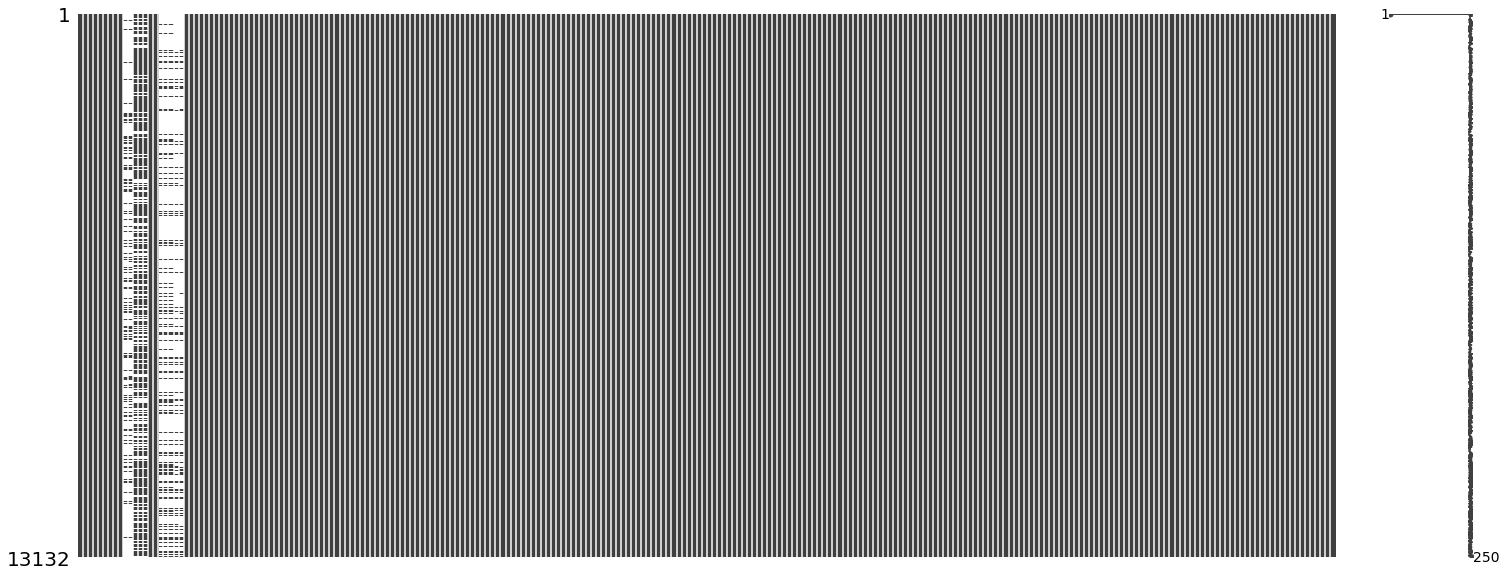

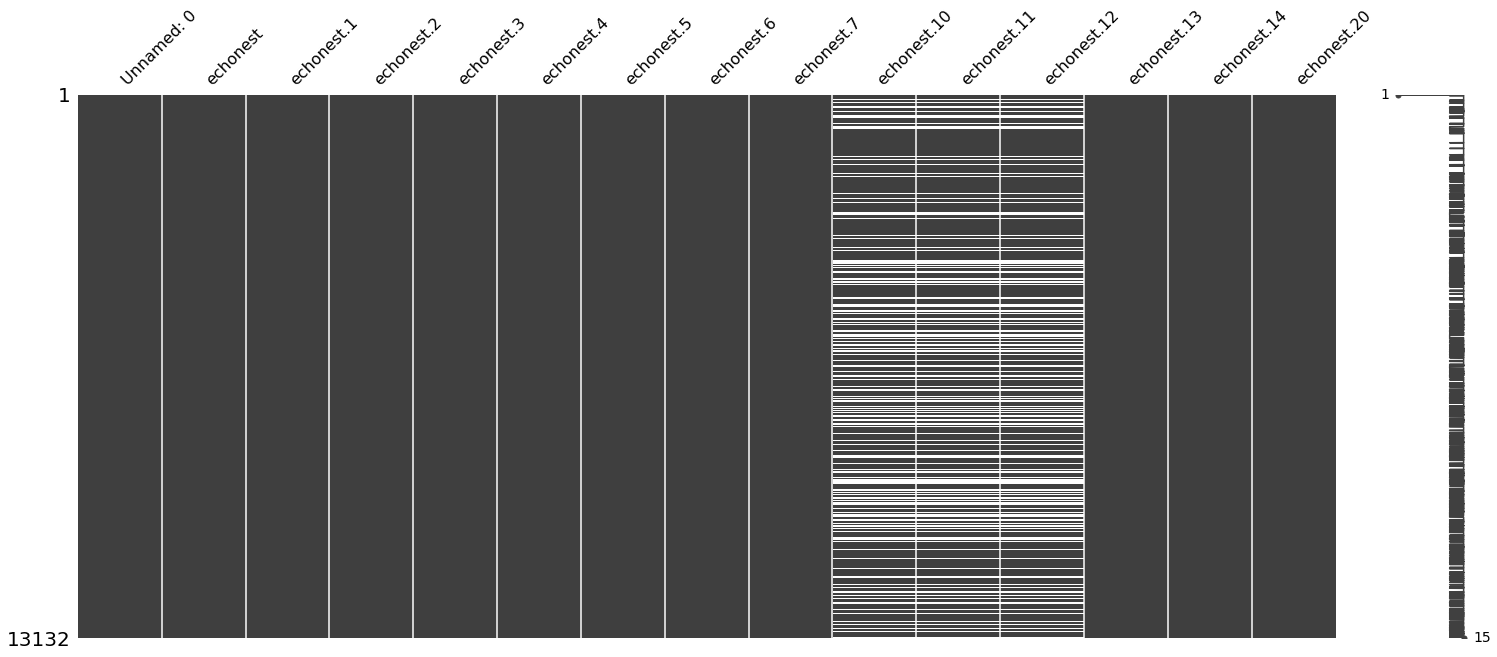

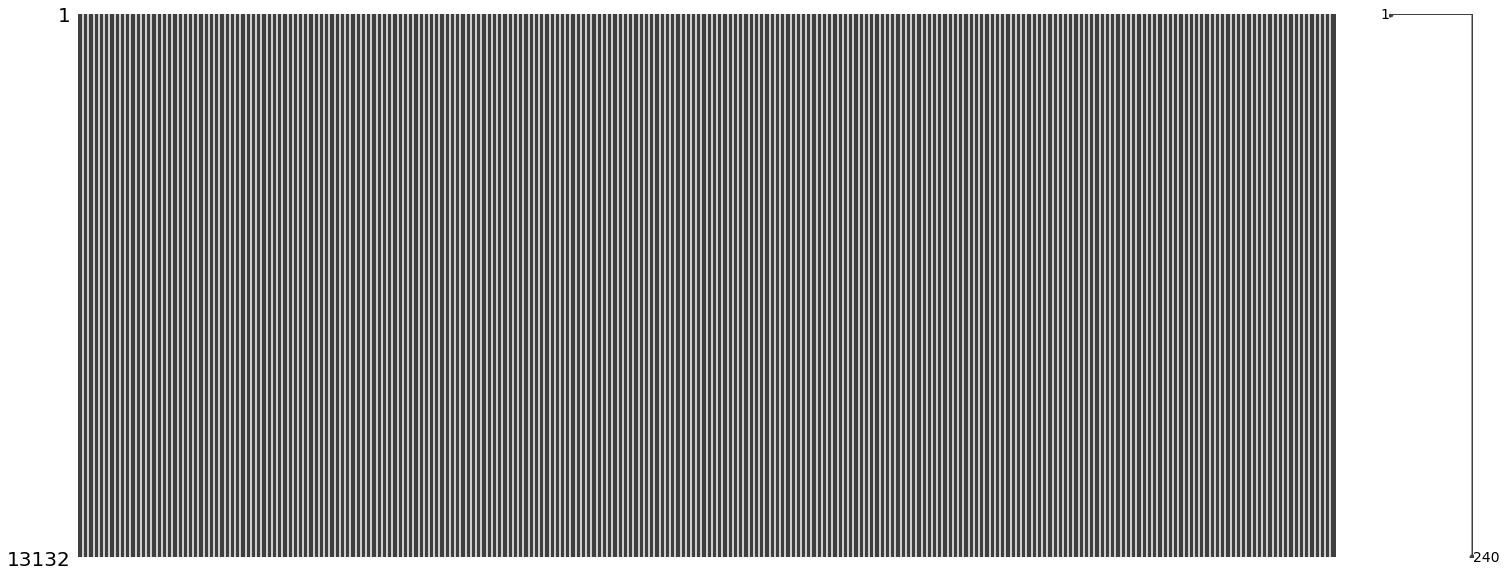

In [ ]:
ms.matrix(echonest)
echonest.drop(['echonest.8', 'echonest.9', 'echonest.15', 'echonest.16', 'echonest.17', 'echonest.18', 'echonest.19'], axis=1, inplace=True)
echonest.tail(15)
ms.matrix(echonest.iloc[:, 0:15])
echonest.drop(['echonest.10', 'echonest.11', 'echonest.12'], axis=1, inplace=True)
ms.matrix(echonest)
echonest.head(10)
echonest.drop(0, axis=0, inplace=True)
echonest.iloc[0, 0]
echonest.iloc[1, 0]
echonest.iloc[0, 0] = echonest.iloc[1, 0]
echonest.head()
echonest.drop(2, axis=0, inplace=True)
echonest.columns = echonest.iloc[0]
echonest.head()
echonest.drop(1, axis=0, inplace=True)
echonest.head()
echonest.reset_index(inplace=True)
echonest.drop('index', inplace=True, axis=1)
echonest.head()
type(echonest['acousticness'][0])
def convert_to_float(df, columns):
    for i in columns:
        df[i] = df[i].astype('float')
    return df
echonest = convert_to_float(echonest, set(echonest.columns) - set(['track_id', 'artist_name', 'release']))
echonest.head()
echonest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106577 entries, 0 to 106576
Columns: 519 entries, feature to zcr.6
dtypes: object(519)
memory usage: 422.0+ MB


<AxesSubplot:>

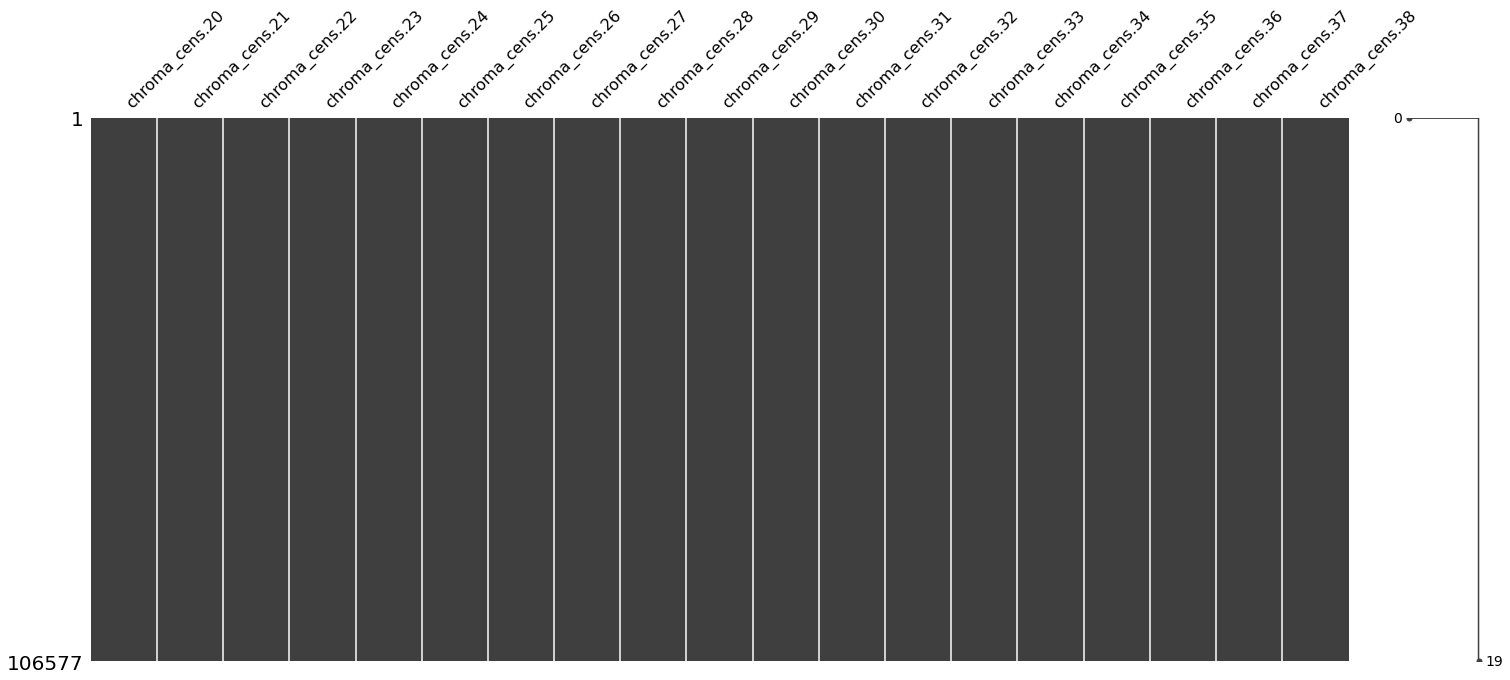

In [ ]:
features.info()
features.head(10)
ms.matrix(features.iloc[:, 21:40])

,feature track_id,chroma_cens kurtosis,chroma_cens.1 kurtosis,chroma_cens.2 kurtosis,chroma_cens.3 kurtosis,chroma_cens.4 kurtosis,chroma_cens.5 kurtosis,chroma_cens.6 kurtosis,chroma_cens.7 kurtosis,chroma_cens.8 kurtosis,chroma_cens.9 kurtosis,chroma_cens.10 kurtosis,chroma_cens.11 kurtosis,chroma_cens.12 max,chroma_cens.13 max,chroma_cens.14 max,chroma_cens.15 max,chroma_cens.16 max,chroma_cens.17 max,chroma_cens.18 max,chroma_cens.19 max,chroma_cens.20 max,chroma_cens.21 max,chroma_cens.22 max,chroma_cens.23 max,chroma_cens.24 mean,chroma_cens.25 mean,chroma_cens.26 mean,chroma_cens.27 mean,chroma_cens.28 mean,chroma_cens.29 mean,chroma_cens.30 mean,chroma_cens.31 mean,chroma_cens.32 mean,chroma_cens.33 mean,chroma_cens.34 mean,chroma_cens.35 mean,chroma_cens.36 median,chroma_cens.37 median,chroma_cens.38 median,chroma_cens.39 median,chroma_cens.40 median,chroma_cens.41 median,chroma_cens.42 median,chroma_cens.43 median,chroma_cens.44 median,chroma_cens.45 median,chroma_cens.46 median,chroma_cens.47 median,chroma_cens.48 min,chroma_cens.49 min,chroma_cens.50 min,chroma_cens.51 min,chroma_cens.52 min,chroma_cens.53 min,chroma_cens.54 min,chroma_cens.55 min,chroma_cens.56 min,chroma_cens.57 min,chroma_cens.58 min,chroma_cens.59 min,chroma_cens.60 skew,chroma_cens.61 skew,chroma_cens.62 skew,chroma_cens.63 skew,chroma_cens.64 skew,chroma_cens.65 skew,chroma_cens.66 skew,chroma_cens.67 skew,chroma_cens.68 skew,chroma_cens.69 skew,chroma_cens.70 skew,chroma_cens.71 skew,chroma_cens.72 std,chroma_cens.73 std,chroma_cens.74 std,chroma_cens.75 std,chroma_cens.76 std,chroma_cens.77 std,chroma_cens.78 std,chroma_cens.79 std,chroma_cens.80 std,chroma_cens.81 std,chroma_cens.82 std,chroma_cens.83 std,chroma_cqt kurtosis,chroma_cqt.1 kurtosis,chroma_cqt.2 kurtosis,chroma_cqt.3 kurtosis,chroma_cqt.4 kurtosis,chroma_cqt.5 kurtosis,chroma_cqt.6 kurtosis,chroma_cqt.7 kurtosis,chroma_cqt.8 kurtosis,chroma_cqt.9 kurtosis,chroma_cqt.10 kurtosis,chroma_cqt.11 kurtosis,chroma_cqt.12 max,chroma_cqt.13 max,chroma_cqt.14 max,chroma_cqt.15 max,chroma_cqt.16 max,chroma_cqt.17 max,chroma_cqt.18 max,chroma_cqt.19 max,chroma_cqt.20 max,chroma_cqt.21 max,chroma_cqt.22 max,chroma_cqt.23 max,chroma_cqt.24 mean,chroma_cqt.25 mean,chroma_cqt.26 mean,chroma_cqt.27 mean,chroma_cqt.28 mean,chroma_cqt.29 mean,chroma_cqt.30 mean,chroma_cqt.31 mean,chroma_cqt.32 mean,chroma_cqt.33 mean,chroma_cqt.34 mean,chroma_cqt.35 mean,chroma_cqt.36 median,chroma_cqt.37 median,chroma_cqt.38 median,chroma_cqt.39 median,chroma_cqt.40 median,chroma_cqt.41 median,chroma_cqt.42 median,chroma_cqt.43 median,chroma_cqt.44 median,chroma_cqt.45 median,chroma_cqt.46 median,chroma_cqt.47 median,chroma_cqt.48 min,chroma_cqt.49 min,chroma_cqt.50 min,chroma_cqt.51 min,chroma_cqt.52 min,chroma_cqt.53 min,chroma_cqt.54 min,chroma_cqt.55 min,chroma_cqt.56 min,chroma_cqt.57 min,chroma_cqt.58 min,chroma_cqt.59 min,chroma_cqt.60 skew,chroma_cqt.61 skew,chroma_cqt.62 skew,chroma_cqt.63 skew,chroma_cqt.64 skew,chroma_cqt.65 skew,chroma_cqt.66 skew,chroma_cqt.67 skew,chroma_cqt.68 skew,chroma_cqt.69 skew,chroma_cqt.70 skew,chroma_cqt.71 skew,chroma_cqt.72 std,chroma_cqt.73 std,chroma_cqt.74 std,chroma_cqt.75 std,chroma_cqt.76 std,chroma_cqt.77 std,chroma_cqt.78 std,chroma_cqt.79 std,chroma_cqt.80 std,chroma_cqt.81 std,chroma_cqt.82 std,chroma_cqt.83 std,chroma_stft kurtosis,chroma_stft.1 kurtosis,chroma_stft.2 kurtosis,chroma_stft.3 kurtosis,chroma_stft.4 kurtosis,chroma_stft.5 kurtosis,chroma_stft.6 kurtosis,chroma_stft.7 kurtosis,chroma_stft.8 kurtosis,chroma_stft.9 kurtosis,chroma_stft.10 kurtosis,chroma_stft.11 kurtosis,chroma_stft.12 max,chroma_stft.13 max,chroma_stft.14 max,chroma_stft.15 max,chroma_stft.16 max,chroma_stft.17 max,chroma_stft.18 max,chroma_stft.19 max,chroma_stft.20 max,chroma_stft.21 max,chroma_stft.22 max,chroma_stft.23 max,chroma_stft.24 mean,chroma_stft.25 mean,chroma_stft.26 mean,chroma_stft.27 mean,chroma_stft.28 mean,chroma_stft.29 mean,chroma_stft.30 mean,chroma_stft.31

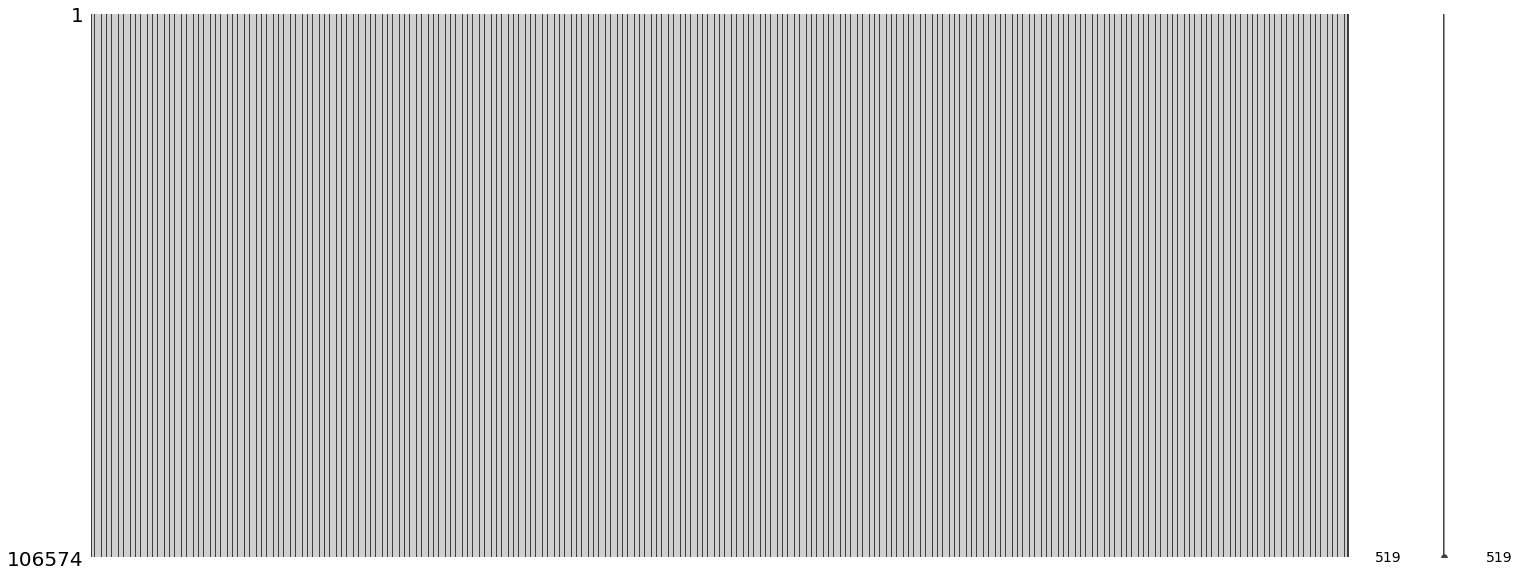

In [ ]:
features.iloc[0,0] = features.iloc[2, 0]
features.head(3)
features.drop(2, inplace=True)
len(features.columns)
len(features.iloc[0])
def combine_two_rows(df):
    columns = list(df.columns)
    for i in range(0, 519):
        columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns
features.columns = combine_two_rows(features)
features.drop([0, 1], inplace=True)
features.reset_index(inplace=True)
features.drop('index', axis=1, inplace=True)
features.head()
features = features.astype(dtype='float')
features['feature track_id'] = features['feature track_id'].astype('int')
ms.matrix(features)
features.head(3)

In [ ]:
tracks.info()
tracks.head()
tracks.iloc[0,0] = tracks.iloc[1, 0]
tracks.drop(1, axis=0, inplace=True)
tracks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106576 entries, 0 to 106575
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  106575 non-null  object
 1   album       106575 non-null  object
 2   album.1     103046 non-null  object
 3   album.2     70295 non-null   object
 4   album.3     15296 non-null   object
 5   album.4     106575 non-null  object
 6   album.5     106575 non-null  object
 7   album.6     83150 non-null   object
 8   album.7     106575 non-null  object
 9   album.8     18061 non-null   object
 10  album.9     106575 non-null  object
 11  album.10    105550 non-null  object
 12  album.11    106575 non-null  object
 13  album.12    100067 non-null  object
 14  artist      22712 non-null   object
 15  artist.1    5376 non-null    object
 16  artist.2    14272 non-null   object
 17  artist.3    71157 non-null   object
 18  artist.4    106575 non-null  object
 19  artist.5    105719 non-

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,album.9,album.10,album.11,album.12,artist,artist.1,artist.2,artist.3,artist.4,artist.5,artist.6,artist.7,artist.8,artist.9,artist.10,artist.11,artist.12,artist.13,artist.14,artist.15,artist.16,set,set.1,track,track.1,track.2,track.3,track.4,track.5,track.6,track.7,track.8,track.9,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,track_id,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.0583238,New Jersey,-74.4056612,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   track_id                106574 non-null  object
 1   album.4 favorites       106574 non-null  object
 2   album.5 id              106574 non-null  object
 3   album.7 listens         106574 non-null  object
 4   album.10 title          105549 non-null  object
 5   album.12 type           100066 non-null  object
 6   artist.6 favorites      106574 non-null  object
 7   artist.12 name          106574 non-null  object
 8   set split               106574 non-null  object
 9   track bit_rate          106574 non-null  object
 10  track.5 duration        106574 non-null  object
 11  track.6 favorites       106574 non-null  object
 12  track.7 genre_top       49598 non-null   object
 13  track.8 genres          106574 non-null  object
 14  track.9 genres_all      106574 non-n

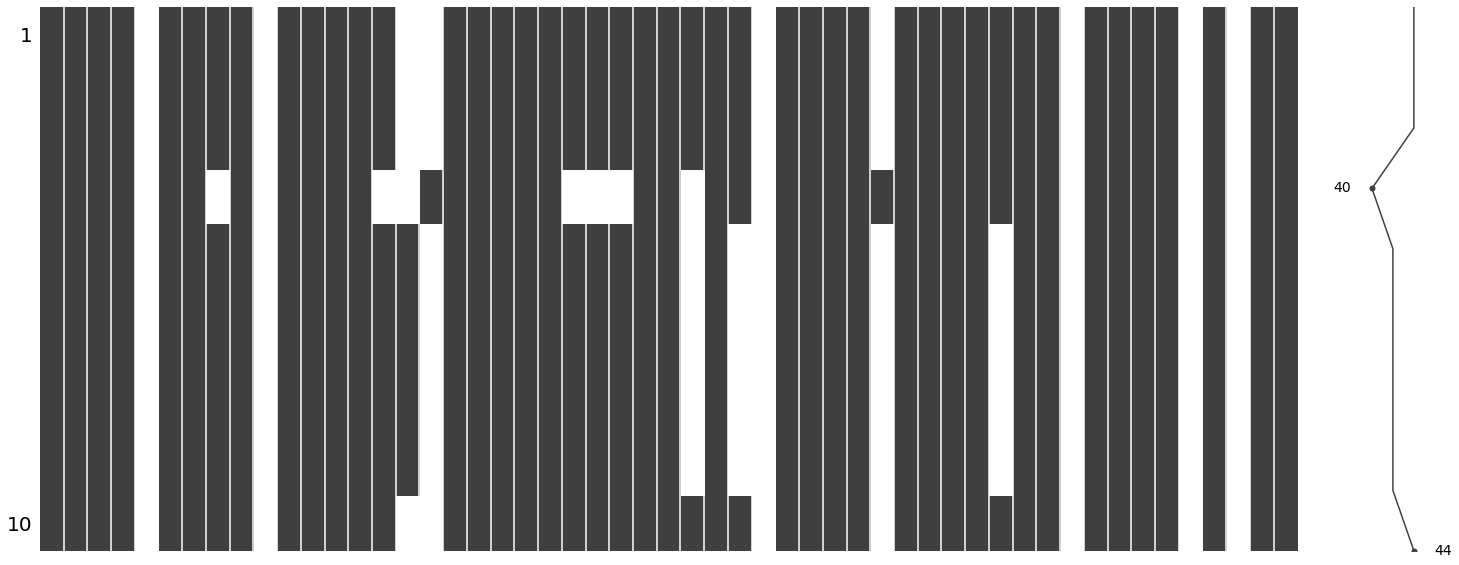

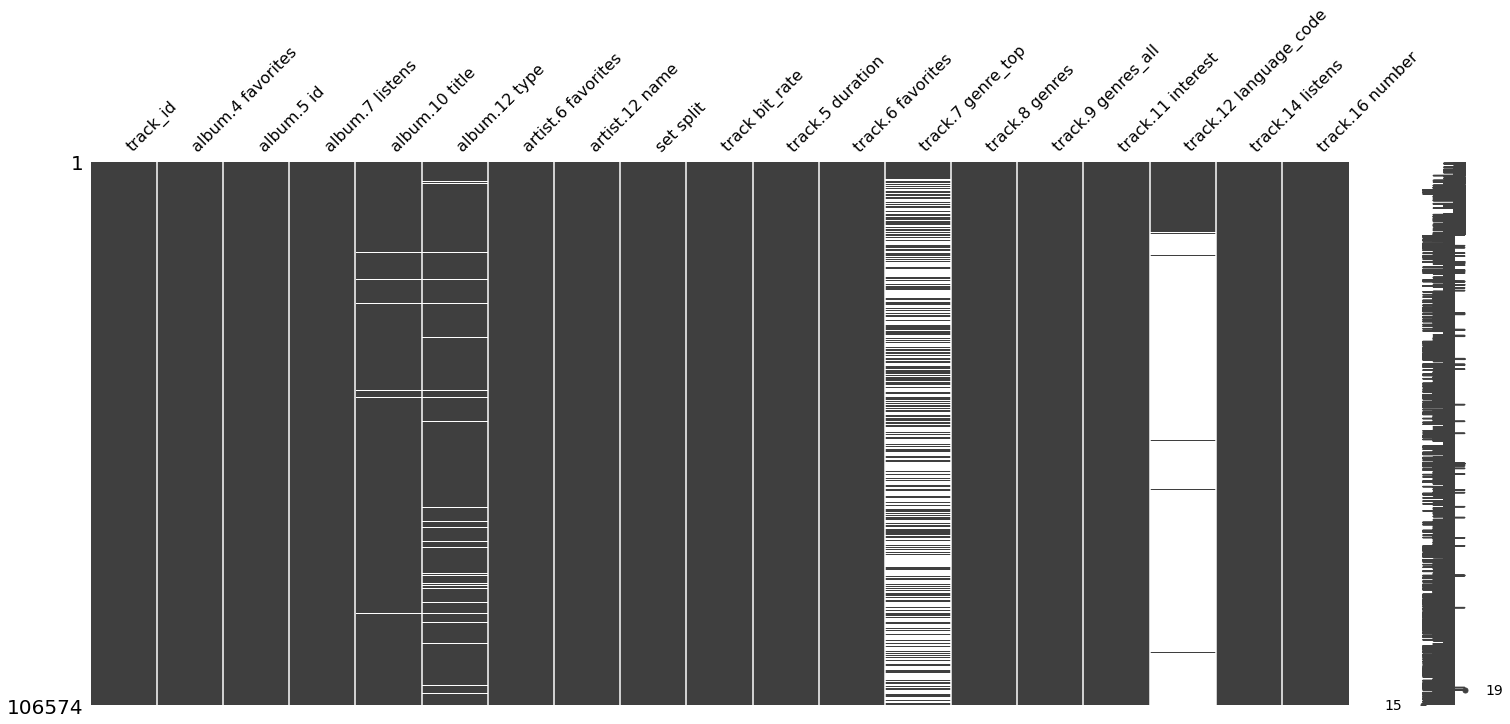

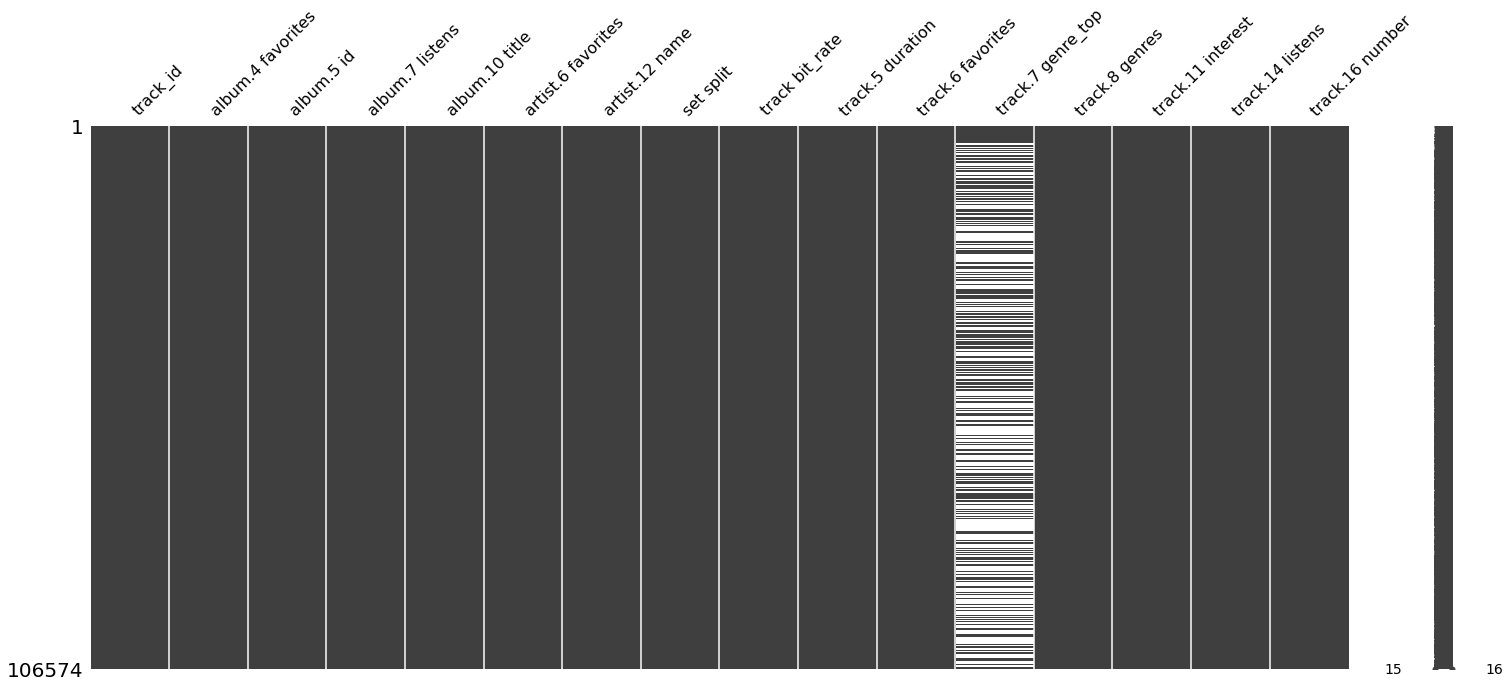

In [ ]:
len(tracks.columns)
def combine_one_row(df):
    columns = list(df.columns)
    for i in range(0, 53):
        if i == 0:
            columns[i] = df.iloc[0, i]
        else:
            columns[i] = columns[i] + " " + df.iloc[0, i]
    return columns
tracks.columns = combine_one_row(tracks)
tracks.drop(0, inplace=True)
tracks.reset_index(inplace=True)
tracks.drop(['index'], axis=1, inplace=True)
ms.matrix(tracks.iloc[0: 10])
tracks.head()
tracks['track.7 genre_top'].value_counts()
track_title = pd.DataFrame(tracks['track.19 title'])
track_title['track_id'] = tracks['track_id']
track_title.head()
track_title.tail()
track_title.shape
tracks.drop(['album comments','album.1 date_created', 
             'album.2 date_released', 'album.11 tracks', 
             'album.9 tags', 'album.8 producer', 'album.3 engineer', 'album.6 information',
             'artist active_year_begin', 'artist.1 active_year_end', 'artist.2 associated_labels',
             'artist.3 bio','artist.4 comments','artist.5 date_created', 'artist.7 id',
             'artist.8 latitude','artist.9 location','artist.10 longitude', 'artist.11 members',
             'artist.13 related_projects', 'artist.14 tags','artist.15 website','artist.16 wikipedia_page',
             'set.1 subset', 'track.1 comments', 'track.2 composer', 'track.3 date_created', 'track.4 date_recorded',
             'track.10 information', 'track.13 license', 'track.15 lyricist', 'track.17 publisher', 'track.18 tags',
             'track.19 title'], axis=1, inplace=True)
tracks.info()
ms.matrix(tracks)
tracks['album.12 type'].value_counts()
tracks['album.10 title'].value_counts()
tracks['album.10 title'].fillna(method='ffill', inplace=True)
tracks.drop(['track.12 language_code', 'album.12 type'], axis=1, inplace=True)
tracks.drop('track.9 genres_all', axis=1, inplace=True)
ms.matrix(tracks)
tracks['track.8 genres'].unique()
genres.info()
type(tracks['track.7 genre_top'].iloc[27])
def getList(cd):
    return cd[1:-1].split(',')
for i in range(0, 106574):
    if type(tracks['track.7 genre_top'][i]) == float:
        genre_list = getList(str(tracks['track.8 genres'][i]))
        count = len(genre_list)
        title = ""
        for j in range(0, count):
            title = title + str(genres['title'][j]) + str('|')
        tracks['track.7 genre_top'][i] = title

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genre_id   163 non-null    int64 
 1   #tracks    163 non-null    int64 
 2   parent     163 non-null    int64 
 3   title      163 non-null    object
 4   top_level  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.5+ KB


,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5


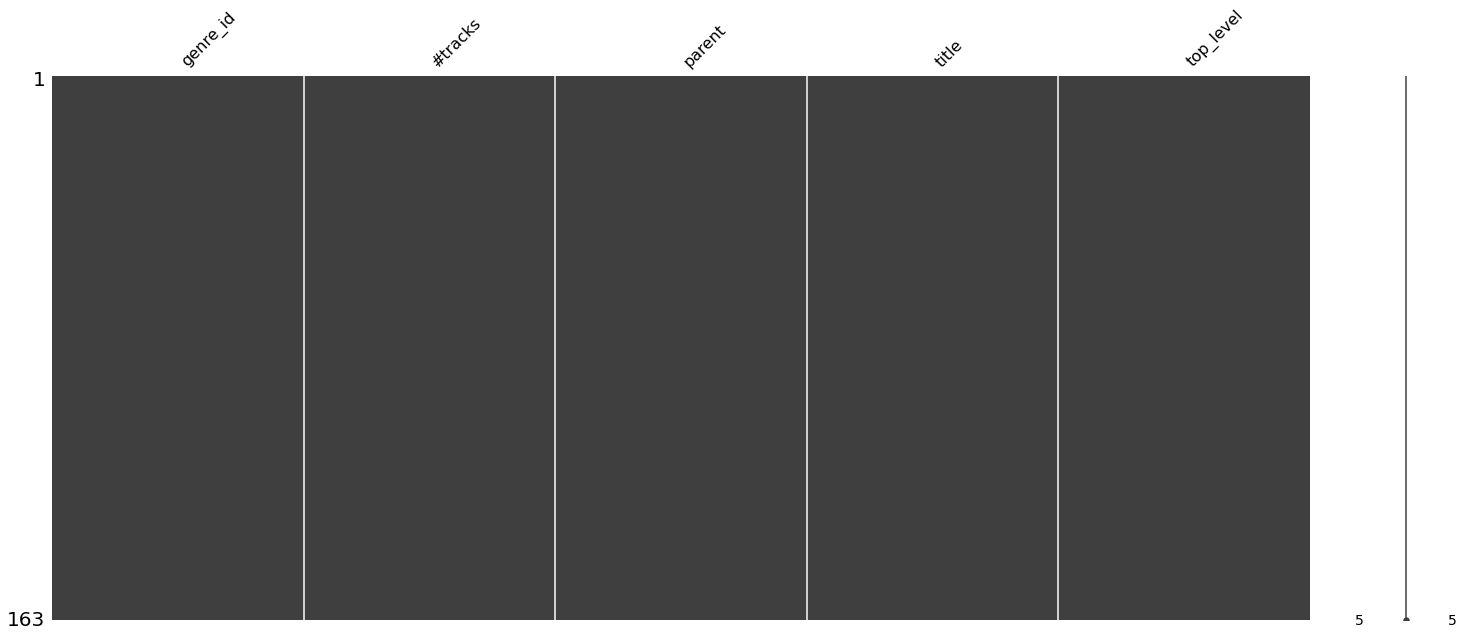

In [ ]:
genres.info()
ms.matrix(genres)
genres.head()

In [ ]:
echonest.info()
tracks.info()
tracks.head()
echonest.head()
genres.info()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Columns: 240 entries, track_id to 223
dtypes: float64(237), object(3)
memory usage: 24.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106574 entries, 0 to 106573
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   track_id            106574 non-null  object
 1   album.4 favorites   106574 non-null  object
 2   album.5 id          106574 non-null  object
 3   album.7 listens     106574 non-null  object
 4   album.10 title      106574 non-null  object
 5   artist.6 favorites  106574 non-null  object
 6   artist.12 name      106574 non-null  object
 7   set split           106574 non-null  object
 8   track bit_rate      106574 non-null  object
 9   track.5 duration    106574 non-null  object
 10  track.6 favorites   106574 non-null  object
 11  track.7 genre_top   106574 non-null  object
 12  track.8 genres      106574 no

<AxesSubplot:>

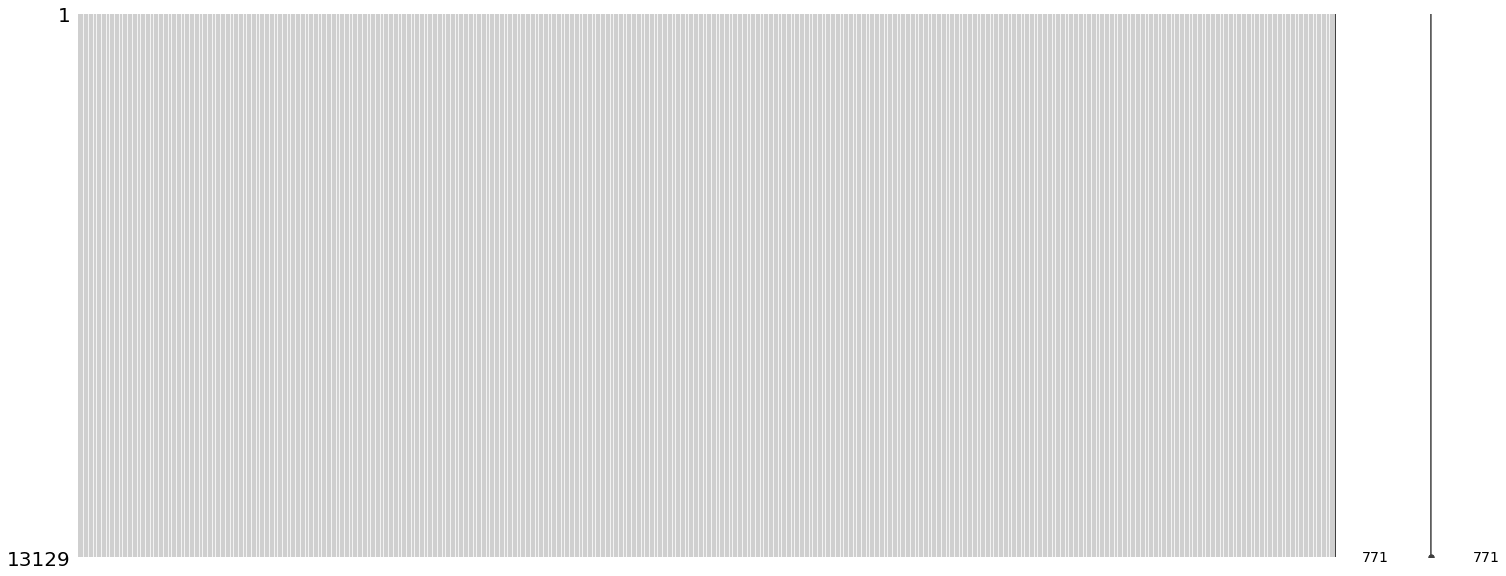

In [ ]:
features.columns = ['track_id'] + list(features.columns[1:])
features.head()
type(echonest['track_id'].iloc[0])
echonest['track_id'] = echonest['track_id'].astype('int')
tracks['track_id'] = tracks['track_id'].astype('int')
features.sort_values(by='track_id', inplace=True)
tracks.sort_values(by='track_id', inplace=True)
echonest.sort_values(by='track_id', inplace=True)
features.head()
tracks.head()
count = 0
for i in range(0, 106574):
    if features['track_id'][i] == tracks['track_id'][i]:
        count += 1
    else:
        print(features['track_id'][i], tracks['track_id'][i])
final = pd.concat([features, tracks.drop('track_id', axis=1)], axis=1)
final.shape
final.head()
echonest.tail(3)
echonest.drop(['artist_name', 'release'], axis=1, inplace=True)
tracks.tail(3)
features.head(1)
final = echonest.merge(final, on='track_id')
final.shape
ms.matrix(final)

In [ ]:
final.head()
final.shape
final.info()
final.drop('track.8 genres', axis=1, inplace=True)
final.shape
final.head()
final['track.7 genre_top'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 771 entries, track_id to track.16 number
dtypes: float64(755), int64(1), object(15)
memory usage: 77.3+ MB


Rock                                                       3892
Electronic                                                 2170
Avant-Garde|International|                                 1902
Avant-Garde|International|Blues|                           1507
Hip-Hop                                                     910
Folk                                                        874
Old-Time / Historic                                         357
Pop                                                         346
Avant-Garde|International|Blues|Jazz|                       269
Classical                                                   265
Jazz                                                        241
International                                               133
Instrumental                                                 84
Avant-Garde|International|Blues|Jazz|Classical|              82
Blues                                                        66
Experimental                            

In [ ]:
def format_strings(x):
    if '-' in x:
        return ''.join(x.split('-'))
    if x.find('/'):
        return '|'.join(x.split('/'))
    return x
def modifyString(serie, val):
    for i in range(0, val):
        if serie[i] == 'Old-Time / Historic':
            serie[i] = 'OldTime|Historic'
    return serie
final['track.7 genre_top'] = modifyString(final['track.7 genre_top'], 13129)
final['track.7 genre_top'] = final['track.7 genre_top'].apply(format_strings)
final['track.7 genre_top'].value_counts()
final.head()
metadata = pd.DataFrame()
metadata['track_id'] = final['track_id']
metadata.shape
track_title.shape
track_title = track_title.set_index('track_id')
track_title.head()
track_title.index = [int(i) for i in track_title.index]
track_title.head()
metadata.head()
metadata['album_title'] = final['album.10 title']
metadata['artist_name'] = final['artist.12 name']
metadata['genre'] = final['track.7 genre_top']
metadata = metadata.set_index('track_id')
metadata.tail()
metadata.head()
metadata['track_title'] = track_title.loc[metadata.index]['track.19 title']
metadata.tail()
metadata.head()
len(metadata[metadata['genre'].isnull()])
final.drop('album.10 title', axis=1, inplace=True)
final.head()
final.info()
final.drop('artist.12 name', axis=1, inplace=True)
final.info()
final.head()
k = final # Restore point # Removed Label Encoding
final.head()
final.drop('set split', axis=1, inplace=True)
final.info()
final.info()
genres['title'].count()
genre_dummy = pd.DataFrame(data= np.zeros((13129, 163)), columns= list(genres['title'].unique()))
genre_dummy.head()
genre_list = pd.Series(data= genre_dummy.columns)
genre_list = modifyString(genre_list, 163)
genre_list = genre_list.apply(format_strings)
genre_dummy.columns= genre_list
# columns converted successfully
genre_list = list(genre_list)
final
for i in range(0, 13129):
    if '|' in final['track.7 genre_top'][i]:
        divided_list = str(final['track.7 genre_top'][i]).split('|')
        count = len(divided_list)
        for j in range(0, count):
            if divided_list[j] in genre_list:
                location = genre_list.index(divided_list[j])
                genre_dummy.iloc[i, location] = 1
    else:
        location = genre_list.index(final['track.7 genre_top'][i])
        genre_dummy.iloc[i, location] = 1
genre_list.index(final['track.7 genre_top'][0])
final.drop(['track.7 genre_top'], axis= 1, inplace= True)
final = pd.concat([final, genre_dummy], axis= 1)
final.head()

<ipython-input-31-1ccf465b47d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie[i] = 'OldTime|Historic'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 769 entries, track_id to track.16 number
dtypes: float64(755), int64(1), object(13)
memory usage: 77.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 768 entries, track_id to track.16 number
dtypes: float64(755), int64(1), object(12)
memory usage: 77.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 767 entries, track_id to track.16 number
dtypes: float64(755), int64(1), object(11)
memory usage: 77.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 767 entries, track_id to track.16 number
dtypes: float64(755), int64(1), object(11)
memory usage: 77.4+ MB


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017,018,019,020,021,022,023,024,025,026,027,028,029,030,031,032,033,034,035,036,037,038,039,040,041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,057,058,059,060,061,062,063,064,065,066,067,068,069,070,071,072,073,074,075,076,077,078,079,080,081,082,083,084,085,086,087,088,089,090,091,092,093,094,095,096,097,098,099,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,chroma_cens kurtosis,chroma_cens.1 kurtosis,chroma_cens.2 kurtosis,chroma_cens.3 kurtosis,chroma_cens.4 kurtosis,chroma_cens.5 kurtosis,chroma_cens.6 kurtosis,chroma_cens.7 kurtosis,chroma_cens.8 kurtosis,chroma_cens.9 kurtosis,chroma_cens.10 kurtosis,chroma_cens.11 kurtosis,chroma_cens.12 max,chroma_cens.13 max,chroma_cens.14 max,chroma_cens.15 max,chroma_cens.16 max,chroma_cens.17 max,chroma_cens.18 max,chroma_cens.19 max,chroma_cens.20 max,chroma_cens.21 max,chroma_cens.22 max,chroma_cens.23 max,chroma_cens.24 mean,chroma_cens.25 mean,chroma_cens.26 mean,chroma_cens.27 mean,chroma_cens.28 mean,chroma_cens.29 mean,chroma_cens.30 mean,chroma_cens.31 mean,chroma_cens.32 mean,chroma_cens.33 mean,chroma_cens.34 mean,chroma_cens.35 mean,chroma_cens.36 median,chroma_cens.37 median,chroma_cens.38 median,chroma_cens.39 median,chroma_cens.40 median,chroma_cens.41 median,chroma_cens.42 median,chroma_cens.43 median,chroma_cens.44 median,chroma_cens.45 median,chroma_cens.46 median,chroma_cens.47 median,chroma_cens.48 min,chroma_cens.49 min,chroma_cens.50 min,chroma_cens.51 min,chroma_cens.52 min,chroma_cens.53 min,chroma_cens.54 min,chroma_cens.55 min,chroma_cens.56 min,chroma_cens.57 min,chroma_cens.58 min,chroma_cens.59 min,chroma_cens.60 skew,chroma_cens.61 skew,chroma_cens.62 skew,chroma_cens.63 skew,chroma_cens.64 skew,chroma_cens.65 skew,chroma_cens.66 skew,chroma_cens.67 skew,chroma_cens.68 skew,chroma_cens.69 skew,chroma_cens.70 skew,chroma_cens.71 skew,chroma_cens.72 std,chroma_cens.73 std,chroma_cens.74 std,chroma_cens.75 std,chroma_cens.76 std,chroma_cens.77 std,chroma_cens.78 std,chroma_cens.79 std,chroma_cens.80 std,chroma_cens.81 std,chroma_cens.82 std,chroma_cens.83 std,chroma_cqt kurtosis,chroma_cqt.1 kurtosis,chroma_cqt.2 kurtosis,chroma_cqt.3 kurtosis,chroma_cqt.4 kurtosis,chroma_cqt.5 kurtosis,chroma_cqt.6 kurtosis,chroma_cqt.7 kurtosis,chroma_cqt.8 kurtosis,chroma_cqt.9 kurtosis,chroma_cqt.10 kurtosis,chroma_cqt.11 kurtosis,chroma_cqt.12 max,chroma_cqt.13 max,chroma_cqt.14 max,chroma_cqt.15 max,chroma_cqt.16 max,chroma_cqt.17 max,chroma_cqt.18 max,chroma_cqt.19 max,chroma_cqt.20 max,chroma_cqt.21 max,chroma_cqt.22 max,chroma_cqt.23 max,chroma_cqt.24 mean,chroma_cqt.25 mean,chroma_cqt.26 mean,chroma_cqt.27 mean,chroma_cqt.28 mean,chroma_cqt.29 mean,chroma_cqt.30 mean,chroma_cqt.31 mean,chroma_cqt.32 mean,chroma_cqt.33 mean,chroma_cqt.34 mean,chroma_cqt.35 mean,chroma_cqt.36 median,chroma_cqt.37 median,chroma_cqt.38 median,chroma_cqt.39 median,chroma_cqt.40 median,chroma_cqt.41 median,chroma_cqt.42 median,chroma_cqt.43 median,chroma_cqt.44 median,chroma_cqt.45 median,chroma_cqt.46 median,chroma_cqt.47 median,chroma_cqt.48 min,chroma_cqt.49 min,chroma_cqt.50 min,chroma_cqt.51 min,chroma_cqt.52 min,chroma_cqt.53 min,chroma_cqt.54 min,chroma_cqt.55 min,chroma_cqt.56 min,chroma_cqt.57 min,chroma_cqt.58 min,chroma_cqt.59 min,chroma_cqt.60 skew,chroma_cqt.61 skew,chroma_

In [ ]:
import os

if not os.path.isdir(os.path.join('datasets','final')):
    os.makedirs(os.path.join('datasets','final'))
    
metadata.to_csv('datasets/final/metadata.csv')
final.to_csv('datasets/final/final.csv')

MACHINE LEARNING SECTION

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
final = pd.read_csv('datasets/final/final.csv')
metadata = pd.read_csv('datasets/final/metadata.csv')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [ ]:
final = shuffle(final)

In [ ]:
X = final.loc[[i for i in range(0, 6000)]]
Y = final.loc[[i for i in range(6000, final.shape[0])]]

In [ ]:
X = shuffle(X)
Y = shuffle(Y)

In [ ]:
metadata.head()

,batista,track_id,album_title,artist_name,genre,track_title
0,1,2,AWOL - A Way Of Life,AWOL,HipHop,Food
1,2,3,AWOL - A Way Of Life,AWOL,HipHop,Electric Ave
2,3,5,AWOL - A Way Of Life,AWOL,HipHop,This World
3,4,10,Constant Hitmaker,Kurt Vile,Pop,Freeway
4,5,134,AWOL - A Way Of Life,AWOL,HipHop,Street Music


In [ ]:
metadata = metadata.set_index('track_id')

In [ ]:
data=data.drop(['label1','label2'],axis = 1, inplace = True)

NameError: ignored

In [ ]:
kmeans = KMeans(n_clusters=6)

In [ ]:
Y.head()

,Unnamed: 0,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,artist_discovery,artist_familiarity,artist_hotttnesss,song_currency,song_hotttnesss,000,001,002,003,004,005,006,007,008,009,010,011,012,013,014,015,016,017,018,019,020,021,022,023,024,025,026,027,028,029,030,031,032,033,034,035,036,037,038,039,040,041,042,043,044,045,046,047,048,049,050,051,052,053,054,055,056,057,058,059,060,061,062,063,064,065,066,067,068,069,070,071,072,073,074,075,076,077,078,079,080,081,082,083,084,085,086,087,088,089,090,091,092,093,094,095,096,097,098,099,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,chroma_cens kurtosis,chroma_cens.1 kurtosis,chroma_cens.2 kurtosis,chroma_cens.3 kurtosis,chroma_cens.4 kurtosis,chroma_cens.5 kurtosis,chroma_cens.6 kurtosis,chroma_cens.7 kurtosis,chroma_cens.8 kurtosis,chroma_cens.9 kurtosis,chroma_cens.10 kurtosis,chroma_cens.11 kurtosis,chroma_cens.12 max,chroma_cens.13 max,chroma_cens.14 max,chroma_cens.15 max,chroma_cens.16 max,chroma_cens.17 max,chroma_cens.18 max,chroma_cens.19 max,chroma_cens.20 max,chroma_cens.21 max,chroma_cens.22 max,chroma_cens.23 max,chroma_cens.24 mean,chroma_cens.25 mean,chroma_cens.26 mean,chroma_cens.27 mean,chroma_cens.28 mean,chroma_cens.29 mean,chroma_cens.30 mean,chroma_cens.31 mean,chroma_cens.32 mean,chroma_cens.33 mean,chroma_cens.34 mean,chroma_cens.35 mean,chroma_cens.36 median,chroma_cens.37 median,chroma_cens.38 median,chroma_cens.39 median,chroma_cens.40 median,chroma_cens.41 median,chroma_cens.42 median,chroma_cens.43 median,chroma_cens.44 median,chroma_cens.45 median,chroma_cens.46 median,chroma_cens.47 median,chroma_cens.48 min,chroma_cens.49 min,chroma_cens.50 min,chroma_cens.51 min,chroma_cens.52 min,chroma_cens.53 min,chroma_cens.54 min,chroma_cens.55 min,chroma_cens.56 min,chroma_cens.57 min,chroma_cens.58 min,chroma_cens.59 min,chroma_cens.60 skew,chroma_cens.61 skew,chroma_cens.62 skew,chroma_cens.63 skew,chroma_cens.64 skew,chroma_cens.65 skew,chroma_cens.66 skew,chroma_cens.67 skew,chroma_cens.68 skew,chroma_cens.69 skew,chroma_cens.70 skew,chroma_cens.71 skew,chroma_cens.72 std,chroma_cens.73 std,chroma_cens.74 std,chroma_cens.75 std,chroma_cens.76 std,chroma_cens.77 std,chroma_cens.78 std,chroma_cens.79 std,chroma_cens.80 std,chroma_cens.81 std,chroma_cens.82 std,chroma_cens.83 std,chroma_cqt kurtosis,chroma_cqt.1 kurtosis,chroma_cqt.2 kurtosis,chroma_cqt.3 kurtosis,chroma_cqt.4 kurtosis,chroma_cqt.5 kurtosis,chroma_cqt.6 kurtosis,chroma_cqt.7 kurtosis,chroma_cqt.8 kurtosis,chroma_cqt.9 kurtosis,chroma_cqt.10 kurtosis,chroma_cqt.11 kurtosis,chroma_cqt.12 max,chroma_cqt.13 max,chroma_cqt.14 max,chroma_cqt.15 max,chroma_cqt.16 max,chroma_cqt.17 max,chroma_cqt.18 max,chroma_cqt.19 max,chroma_cqt.20 max,chroma_cqt.21 max,chroma_cqt.22 max,chroma_cqt.23 max,chroma_cqt.24 mean,chroma_cqt.25 mean,chroma_cqt.26 mean,chroma_cqt.27 mean,chroma_cqt.28 mean,chroma_cqt.29 mean,chroma_cqt.30 mean,chroma_cqt.31 mean,chroma_cqt.32 mean,chroma_cqt.33 mean,chroma_cqt.34 mean,chroma_cqt.35 mean,chroma_cqt.36 median,chroma_cqt.37 median,chroma_cqt.38 median,chroma_cqt.39 median,chroma_cqt.40 median,chroma_cqt.41 median,chroma_cqt.42 median,chroma_cqt.43 median,chroma_cqt.44 median,chroma_cqt.45 median,chroma_cqt.46 median,chroma_cqt.47 median,chroma_cqt.48 min,chroma_cqt.49 min,chroma_cqt.50 min,chroma_cqt.51 min,chroma_cqt.52 min,chroma_cqt.53 min,chroma_cqt.54 min,chroma_cqt.55 min,chroma_cqt.56 min,chroma_cqt.57 min,chroma_cqt.58 min,chroma_cqt.59 min,chroma_cqt.60 skew,chroma_cqt.61 s

In [ ]:
def fit(df, algo, flag=0):
    if flag:
        algo.fit(df)
    else:
         algo.partial_fit(df)          
    df['label'] = algo.labels_
    return (df, algo)

In [ ]:
def predict(t, Y):
    y_pred = t[1].predict(Y)
    mode = pd.Series(y_pred).mode()
    return t[0][t[0]['label'] == mode.loc[0]]

In [ ]:
def recommend(recommendations, meta, Y):
    dat = []
    for i in Y['track_id']:
        dat.append(i)
    genre_mode = meta.loc[dat]['genre'].mode()
    artist_mode = meta.loc[dat]['artist_name'].mode()
    return meta[meta['genre'] == genre_mode.iloc[0]], meta[meta['artist_name'] == artist_mode.iloc[0]], meta.loc[recommendations['track_id']]

In [ ]:
t = fit(X, kmeans, 1)
recommendations = predict(t, Y)
output = recommend(recommendations, metadata, Y)
genre_recommend, artist_name_recommend, mixed_recommend = output[0], output[1], output[2]
genre_recommend.shape
artist_name_recommend.shape
mixed_recommend.shape
# Genre wise recommendations
genre_recommend.head()
# Artist wise recommendations
artist_name_recommend.head()
# Mixed Recommendations
mixed_recommend.head()
recommendations.head()
artist_name_recommend['artist_name'].value_counts()
genre_recommend['genre'].value_counts()
genre_recommend['artist_name'].value_counts()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Glove Compartment               65
Blah Blah Blah                  62
Mors Ontologica                 50
Les Baudouins Morts             38
Kraus                           35
                                ..
Alone in 1982                    1
Ostrich Tuning                   1
The Dalai Lama Rama Fa Fa Fa     1
The Rusty Bells                  1
Lost Boy                         1
Name: artist_name, Length: 725, dtype: int64

In [ ]:
testing = Y.iloc[6:12]['track_id']
testing
ids = testing.loc[testing.index]
songs = metadata.loc[testing.loc[list(testing.index)]]
songs
re = predict(t, Y.iloc[6:12])
output = recommend(re, metadata, Y.iloc[6:12])
ge_re, ge_ar, ge_mix = output[0], output[1], output[2]
ge_re.head()
ge_ar.head(10)
ge_mix.head(10)
ge_re.shape
ge_ar.shape
ge_mix.shape

(1150, 5)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
mini = MiniBatchKMeans(n_clusters = 6)
X.drop('label', axis=1, inplace=True)
# Let's divide the intital dataset into pieces to demonstrate online learning
part_1, part_2, part_3 = X.iloc[0: 2000], X.iloc[2000:4000], X.iloc[4000:6000]
for i in [part_1, part_2, part_3]:
    t = fit(i, mini)
    mini = t[1]
    i = t[0]
X = pd.concat([part_1, part_2, part_3])
X.columns
X.head(3)
X['label'].value_counts()
recommendations = predict((X, mini), Y)
output = recommend(recommendations, metadata, Y)
genre_recommend_mini, artist_name_recommend_mini, mixed_mini = output[0], output[1], output[2]
genre_recommend_mini.shape
artist_name_recommend_mini.shape
# Genre wise recommendations
genre_recommend_mini.head()
# Artist wise recommendations
artist_name_recommend_mini.head()
# Mixed Recommendations
mixed_mini.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-76-b8e161e5eb88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = algo.labels_
<ipython-input-76-b8e161e5eb88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = algo.labels_
<ipython-input-76-b8e161e5eb88>:6: SettingWithCopyWarning: 
A val

,batista,album_title,artist_name,genre,track_title
track_id,,,,,
20240,5143,Classic Material Vol. 3: UI Radio,CM aka Creative,HipHop,UI Radio 2
19470,4867,Deerhunter Live at ATP-NY 2009 on WFMU,Deerhunter,Rock,Agoraphobia
13673,3414,netBloc Vol. 01: The Opening Salvo,Melissa Welch,Electronic,Nano Moon Coral
7014,2045,sleepy,junior85,Electronic,in your sleep
14717,3726,Barriers,pandoras.box,Rock,This Tenderness


In [ ]:
from sklearn.cluster import Birch
birch = Birch(n_clusters = 6)
X.drop('label', axis=1, inplace=True)
# Let's divide the intital dataset into pieces to demonstrate online learning
part_1, part_2, part_3 = X.iloc[0: 2000], X.iloc[2000:4000], X.iloc[4000:6000]
for i in [part_1, part_2, part_3]:
    t = fit(i, birch)
    mini = t[1]
    i = t[0]
X = pd.concat([part_1, part_2, part_3])
X.columns
X.head(3)
X['label'].value_counts()
recommendations = predict((X, birch), Y)
output = recommend(recommendations, metadata, Y)
genre_recommend_birch, artist_name_recommend_birch, mixed_birch = output[0], output[1], output[2]
genre_recommend_birch.shape
artist_name_recommend_birch.shape
# Genre wise recommendations
genre_recommend_birch.head()
# Artist wise recommendations
artist_name_recommend_birch.head()
# Mixed Recommendations
mixed_birch.head()

<ipython-input-76-b8e161e5eb88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = algo.labels_
<ipython-input-76-b8e161e5eb88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = algo.labels_
<ipython-input-76-b8e161e5eb88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,batista,album_title,artist_name,genre,track_title
track_id,,,,,
20240,5143,Classic Material Vol. 3: UI Radio,CM aka Creative,HipHop,UI Radio 2
19470,4867,Deerhunter Live at ATP-NY 2009 on WFMU,Deerhunter,Rock,Agoraphobia
13673,3414,netBloc Vol. 01: The Opening Salvo,Melissa Welch,Electronic,Nano Moon Coral
7014,2045,sleepy,junior85,Electronic,in your sleep
14717,3726,Barriers,pandoras.box,Rock,This Tenderness
